数据的训练集和测试集
=====================================

为了评估我们的监督模型的泛化程度，我们可以将数据分成训练和测试集:
<img src="figures/train_test_split_matrix.svg" width="100%">

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

考虑到机器学习通常是如何执行的，训练/测试拆分的想法是有意义的，尽管受过训练的分类器必须从根本上预测新的数据。我们可以在训练过程中模拟这一点，测试数据是模拟“未来数据”。

Iris数据集中的150个标签是排序的，这意味着如果我们使用比例分割来分割数据，这将导致分级改变。例如，如果我们要执行一个常见的2/3的训练数据和1/3的测试数据拆分，我们的训练数据集将只包含花类0和1（Setosa和Versicolor），而我们的测试集将只包含样本班级标签2（Virginica花）。

假设所有样本都是相互独立的（对比时间序列数据），我们希望在分割数据集之前**对数据集随机的洗牌**，如上图所示。

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

现在我们需要把数据分成训练和测试。幸运的是，这是机器学习中的一个常见模式，而scikit- learn有一个预先构建的函数，可以将数据分解为训练和测试集。在这里，我们使用50%的数据作为训练，50%的测试。80%和20%是另一个常见的分割，但没有硬性规定。最重要的是要公平地评估你的系统，而不是在训练中看到的数据。

In [3]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    random_state=123)#random_state使数据不发生变化
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


通过评估，我们可以了解分类器性能。

In [5]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))  

Fraction Correct [Accuracy]:
0.9466666666666667


我们也可以查看正确和失败的预测。

In [6]:
print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Samples correctly classified:
[ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Samples incorrectly classified:
[ 0  5 23 27]


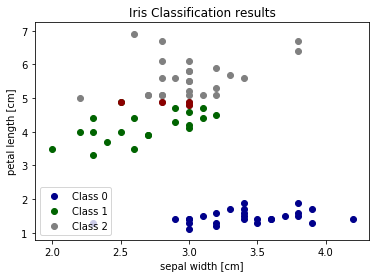

In [7]:
# 绘制二维图像
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], color=color, label="Class %s" % str(n))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

我们可以看到，错误发生在绿色(类1)和灰色(类2)重叠的区域。
这让我们了解了添加什么特性——任何有助于分离类1和类2的特性都应该改进分类器性能。